#  **Filtros FIR y Ventana de Hamming**

## Filtrado FIR por convolución
Un filtro digital **FIR (Finite Impulse Response)** se implementa mediante una convolución discreta entre la señal de entrada $x[n]$ y la respuesta al impulso del filtro $h[k]$:

$$
y[n] = \sum_{k=0}^{M-1} h[k] \cdot x[n-k]
$$

donde:  
- $x[n]$ = señal de entrada  
- $h[k]$ = coeficientes del filtro  
- $y[n]$ = salida filtrada  
- $M$ = número de coeficientes del filtro  

---

##  Respuesta ideal al impulso
El diseño de filtros digitales parte de la **respuesta en frecuencia ideal ante un impulso**, la cual se obtiene al aplicar la siguiente expresión (Transformada de Fourier):

$$
h_{LP}(n) = \frac{1}{2\pi} \int_{-\omega_c}^{\omega_c} H_{LP}(e^{j\omega}) \, e^{j\omega n} \, d\omega
$$


donde $\omega_c$ es la frecuencia de corte del filtro y $H_{LP}(e^{j\omega}$) es la funcíon que describe el comportamiento del filtro.

### Respuesta de los filtros ideales ante el impulso  

**Filtro pasa bajas (LPF):**  
$$
h_{LP}(n) = 
\begin{cases} 
\dfrac{\omega_c}{\pi}, & n = 0 \\
\dfrac{\sin(\omega_c n)}{\pi n}, & n \neq 0
\end{cases}
$$  

**Filtro pasa altas (HPF):**  
$$
h_{HP}(n) = 
\begin{cases} 
1 - \dfrac{\omega_c}{\pi}, & n = 0 \\
-\dfrac{\sin(\omega_c n)}{\pi n}, & n \neq 0
\end{cases}
$$  

**Filtro pasa banda (BPF):**  
$$
h_{BP}(n) = 
\begin{cases} 
\dfrac{\sin(\omega_2 n)}{\pi n} - \dfrac{\sin(\omega_1 n)}{\pi n}, & n \neq 0 \\
\dfrac{\omega_2}{\pi} - \dfrac{\omega_1}{\pi}, & n = 0
\end{cases}
$$  

**Filtro rechaza banda (BSF):**  
$$
h_{BS}(n) = 
\begin{cases} 
1 - \dfrac{\omega_2 - \omega_1}{\pi}, & n = 0 \\
\dfrac{\sin(\omega_1 n)}{\pi n} - \dfrac{\sin(\omega_2 n)}{\pi n}, & n \neq 0
\end{cases}
$$  


---

##  El problema de la respuesta infinita
La respuesta ideal de un filtro es **infinita** en el tiempo (no realizable en la práctica).  
Para obtener un filtro implementable, es necesario **truncar** esta respuesta.

---

##  Método de las ventanas
Una técnica común es multiplicar la respuesta al impulso ideal $h_{ideal}[n]$ por una **ventana $w[n]$** :


**$h[n] = h_{ideal}[n] \cdot w[n] $**


De esta forma, se limita la duración del filtro, reduciendo los lóbulos secundarios y evitando oscilaciones en la respuesta en frecuencia.

---

## Ventana de Hamming
La ventana de Hamming es una de las más usadas porque ofrece un buen compromiso entre ancho de banda de transición y atenuación en los lóbulos laterales. Está definida como:

$$
w[n] = 0.54 - 0.46 \cos\left(\frac{2\pi n}{M}\right), \quad -M \leq n \leq M
$$

**Ventajas principales:**
- Suaviza los bordes del filtro  
- Disminuye las oscilaciones (fenómeno de Gibbs)  
- Facilita obtener un filtro más estable y eficiente  


# **Resultados y análisis**

## **A) FIR Python Vs. FIR C++**
## **Filtros FIR con ventana Hamming generados con la librería scipy de Python (fs = 1000 Hz, n = 31)**

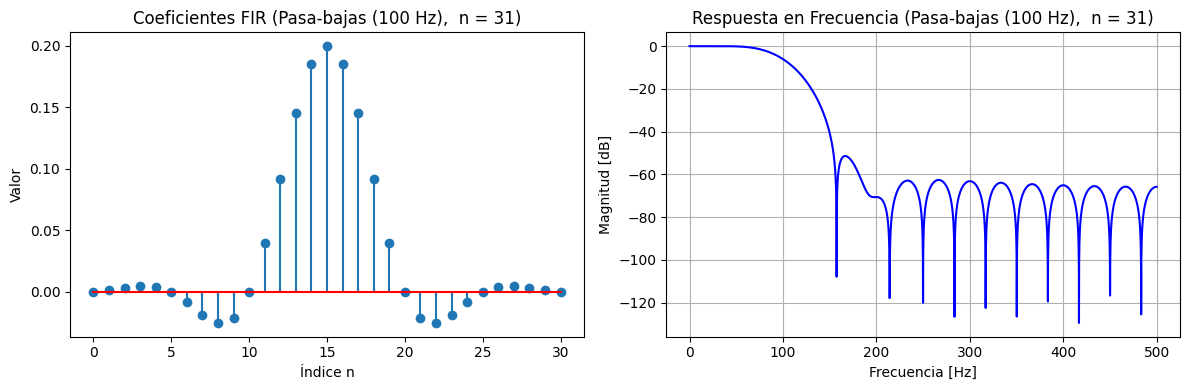

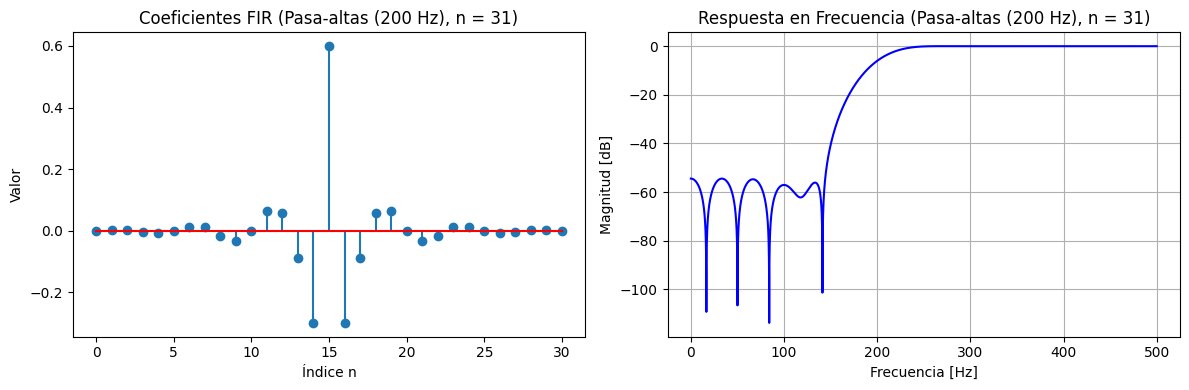

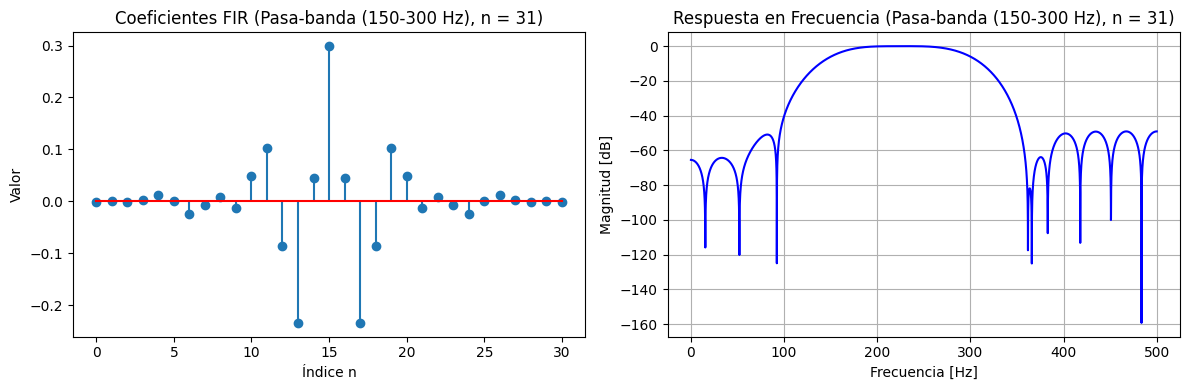

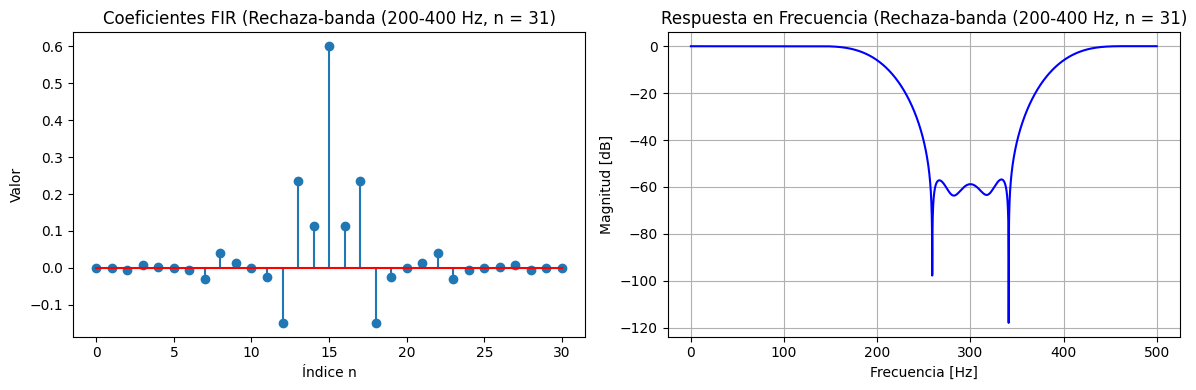

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Parámetros generales
numtaps = 31    # Número de coeficientes (orden + 1, impar recomendado)
fs = 1000       # Frecuencia de muestreo en Hz

# 1) FIR Pasa-bajas
cutoff_lp = 100   # Hz
h_lp = firwin(numtaps, cutoff_lp, fs=fs, window="hamming")

# 2) FIR Pasa-altas
cutoff_hp = 200   # Hz
h_hp = firwin(numtaps, cutoff_hp, fs=fs, window="hamming", pass_zero=False)

# 3) FIR Pasa-banda
band = [150, 300]  # Hz
h_bp = firwin(numtaps, band, fs=fs, window="hamming", pass_zero=False)

# 4) FIR Rechaza-banda
stopband = [200, 400]  # Hz
h_bs = firwin(numtaps, stopband, fs=fs, window="hamming", pass_zero=True)


# --- Función para graficar coeficientes y respuesta en frecuencia ---
def plot_filter(h, fs, title):
    w, H = freqz(h, worN=8000)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Coeficientes
    axs[0].stem(np.arange(len(h)), h, basefmt="r")
    axs[0].set_title(f"Coeficientes FIR ({title})")
    axs[0].set_xlabel("Índice n")
    axs[0].set_ylabel("Valor")

    # Respuesta en frecuencia
    axs[1].plot((w/np.pi) * (fs/2), 20*np.log10(np.abs(H)), "b")
    axs[1].set_title(f"Respuesta en Frecuencia ({title})")
    axs[1].set_xlabel("Frecuencia [Hz]")
    axs[1].set_ylabel("Magnitud [dB]")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


# --- Graficar cada filtro ---
plot_filter(h_lp, fs, "Pasa-bajas (100 Hz),  n = 31")
plot_filter(h_hp, fs, "Pasa-altas (200 Hz), n = 31")
plot_filter(h_bp, fs, "Pasa-banda (150-300 Hz), n = 31")
plot_filter(h_bs, fs, "Rechaza-banda (200-400 Hz, n = 31")


### **Filtros FIR con ventana Hamming generados en C++ (fs = 1000 Hz, n = 31)**

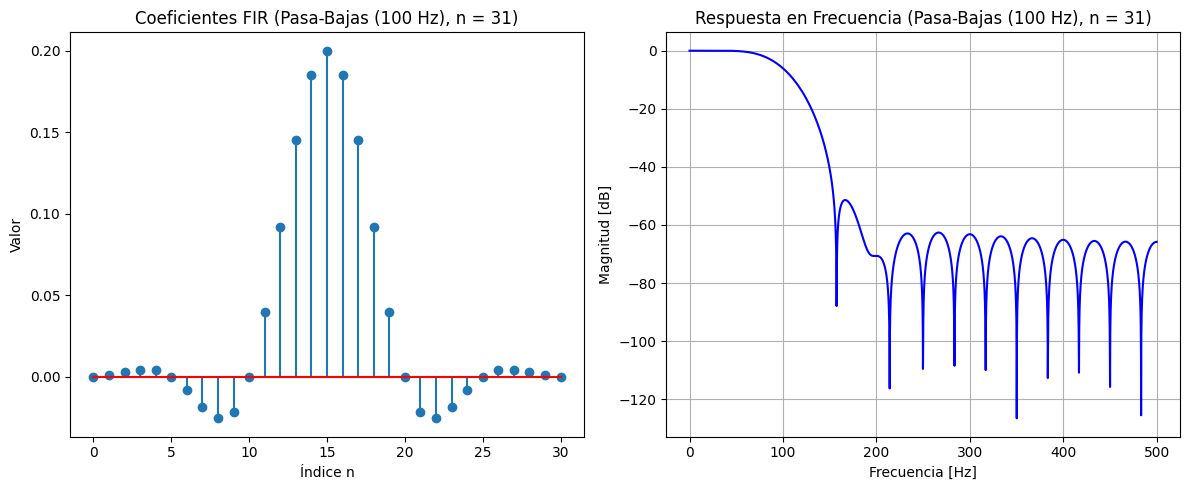

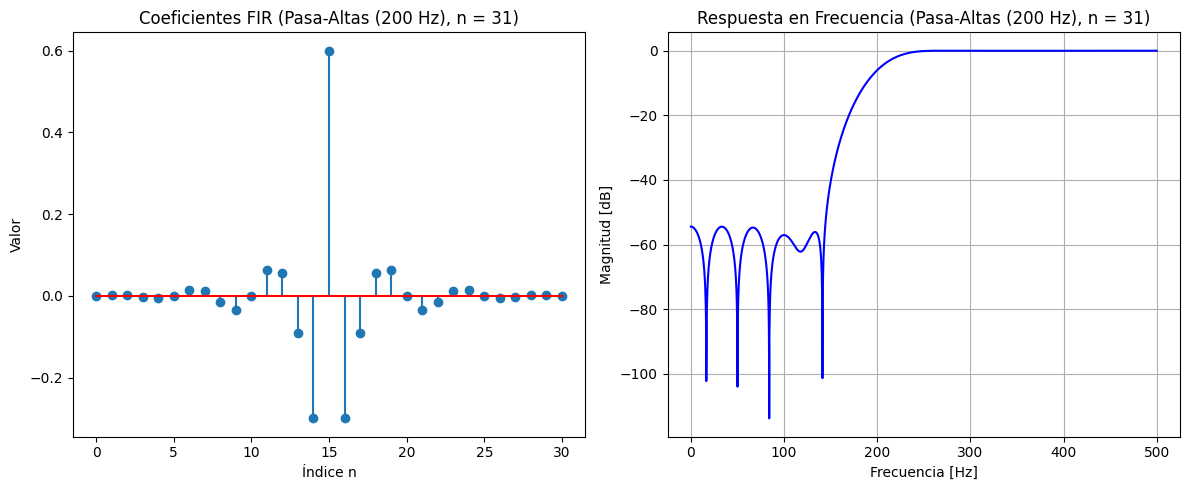

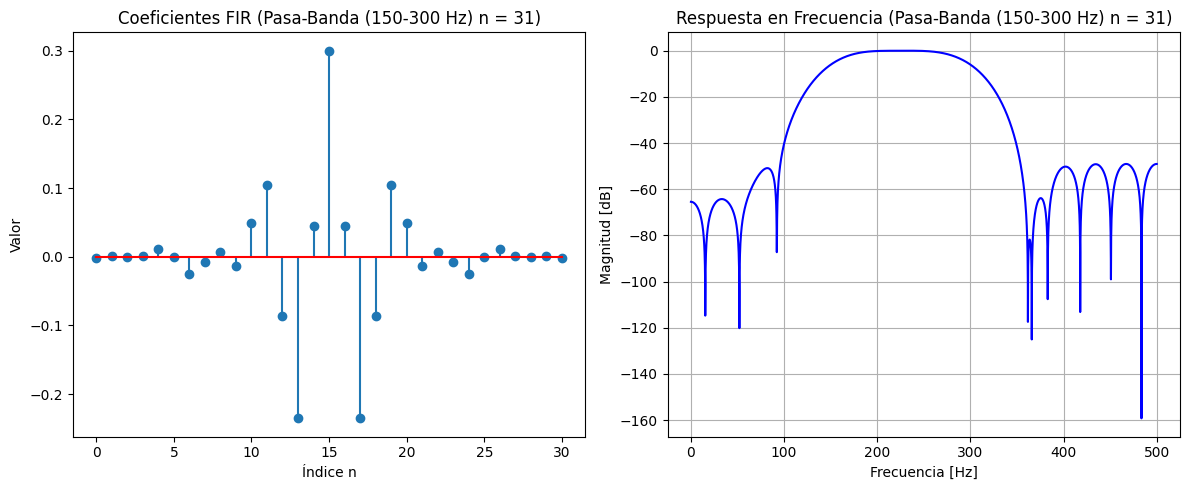

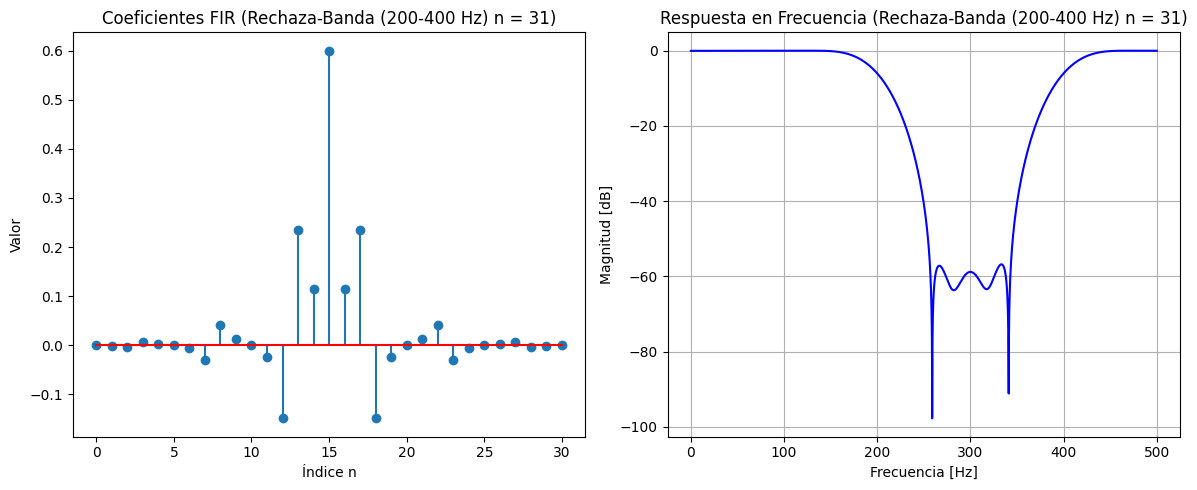

In [27]:
import numpy as np               # Cálculo numérico
import matplotlib.pyplot as plt  # Gráficas

def leer_filtro(filename):
    """
    Lee los coeficientes y la respuesta en frecuencia
    desde un archivo exportado por el programa en C++.
    """
    with open(filename, "r") as f:
        lines = f.readlines()

    # Separar secciones
    coeffs = []
    freqs = []
    mags = []

    lectura_resp = False
    for line in lines:
        line = line.strip()
        if not line or line.startswith("#"):
            if "Frecuencia" in line:
                lectura_resp = True
            continue

        if not lectura_resp:
            coeffs.append(float(line))
        else:
            f_val, m_val = line.split()
            freqs.append(float(f_val))
            mags.append(float(m_val))

    return np.array(coeffs), np.array(freqs), np.array(mags)


def graficar_filtro(filename, titulo="Filtro FIR"):
    """
    Grafica coeficientes y respuesta en frecuencia
    de un archivo exportado.
    """
    coeffs, freqs, mags = leer_filtro(filename)

    plt.figure(figsize=(12, 5))

    # Subplot 1: Coeficientes FIR
    plt.subplot(1, 2, 1)
    plt.stem(range(len(coeffs)), coeffs, basefmt="r-")
    plt.title(f"Coeficientes FIR ({titulo})")
    plt.xlabel("Índice n")
    plt.ylabel("Valor")

    # Subplot 2: Respuesta en frecuencia
    plt.subplot(1, 2, 2)
    plt.plot(freqs, mags, "b")              # Al cambiar freqs por freqs/fs se obtienen las frecuencias normalizadas
    plt.title(f"Respuesta en Frecuencia ({titulo})")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Magnitud [dB]")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# ====== EJEMPLOS DE USO ======
graficar_filtro("../datos/filtro_lowpass.txt", "Pasa-Bajas (100 Hz), n = 31")
graficar_filtro("../datos/filtro_highpass.txt", "Pasa-Altas (200 Hz), n = 31")
graficar_filtro("../datos/filtro_bandpass.txt", "Pasa-Banda (150-300 Hz) n = 31")
graficar_filtro("../datos/filtro_bandstop.txt", "Rechaza-Banda (200-400 Hz) n = 31") 

### **Conclusión 1**

**Al observar los graficos obtenidos se concluye que la respuesta en frecuencia  de los filtros con Ventana de Hamming  implementados en C++ muestran comportamientos fieles a los implementados por librerías de Phython y los que aparecen  en la literatura.**  



## **B) Aumentando el número de coeficientes del filtro FIR C++**
### **Respuesta en frecuencia  FIR C++ (Hammig,   fs = 1000 Hz, n = 128)**

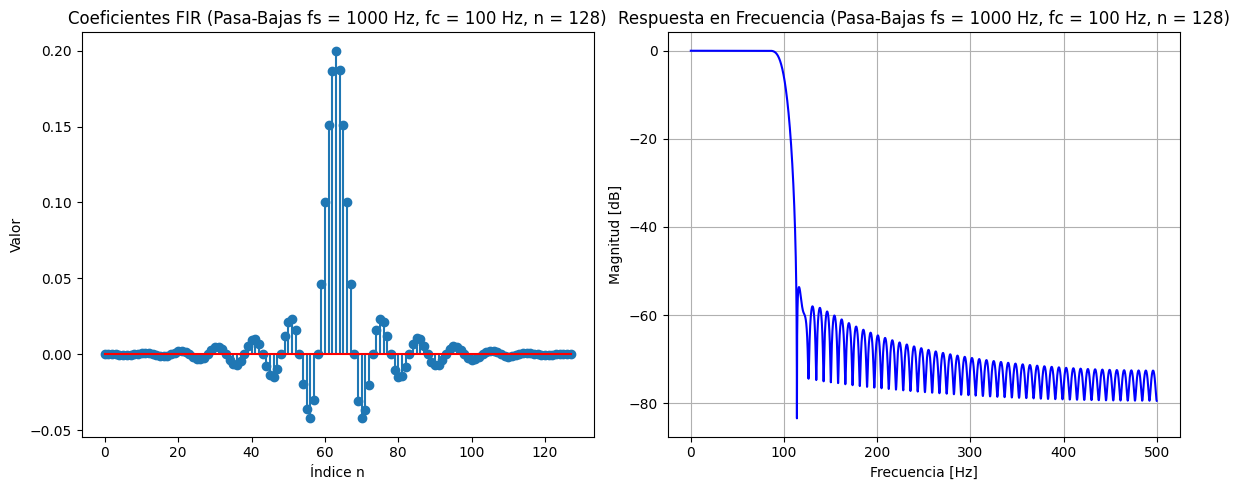

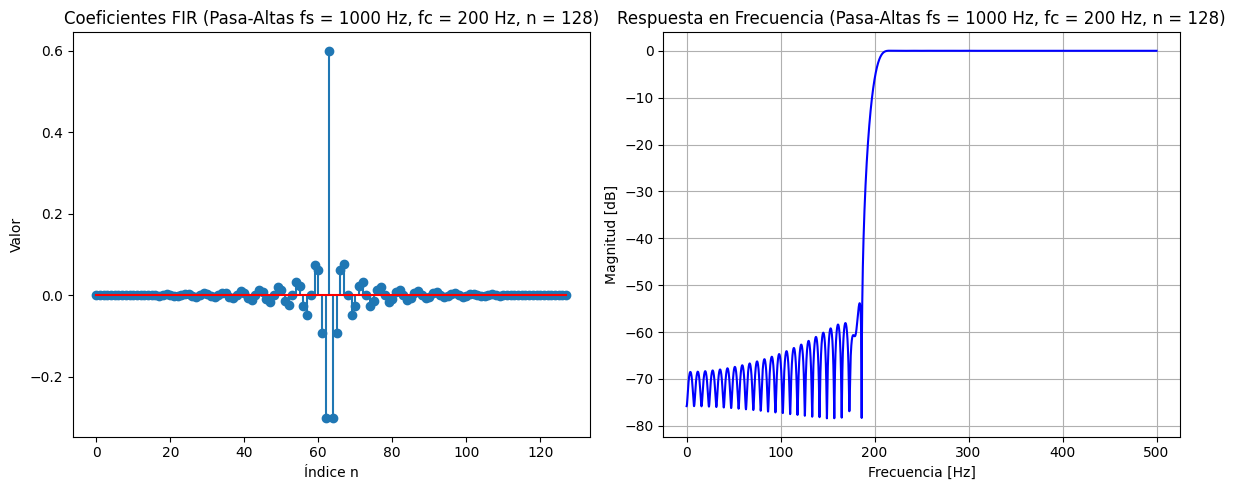

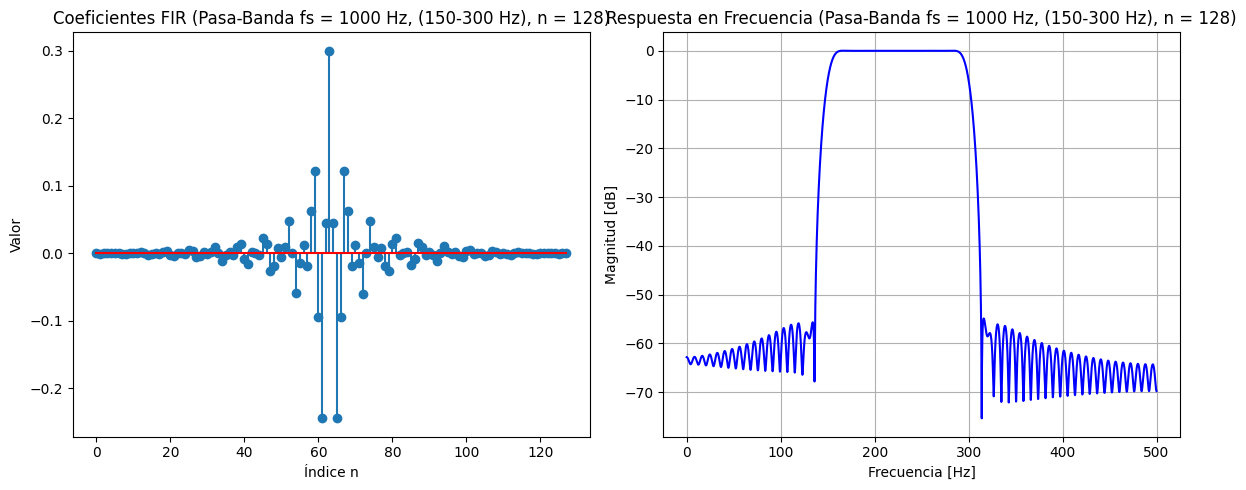

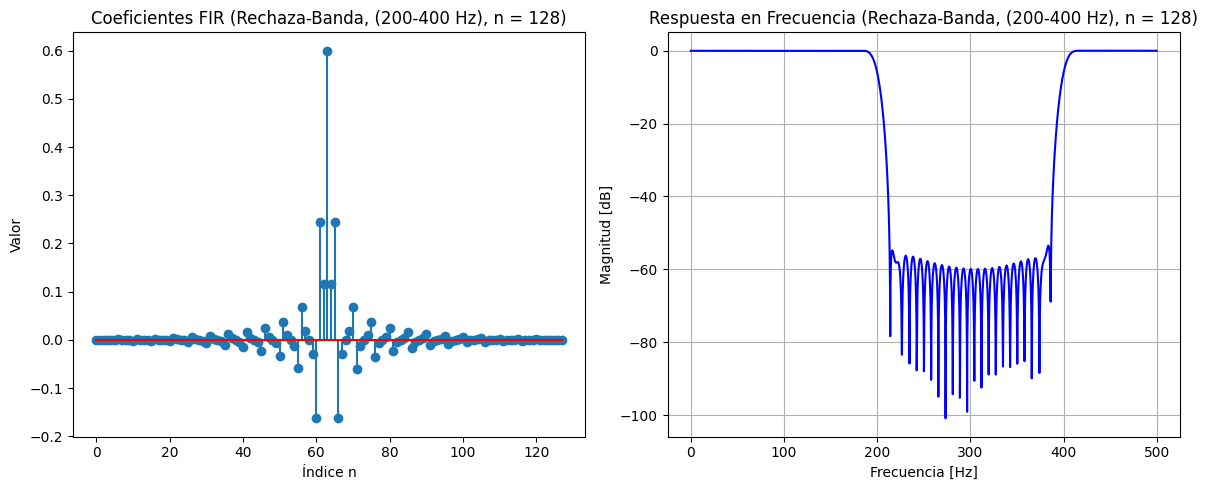

In [30]:
graficar_filtro("../datos/filtro_lowpass.txt", "Pasa-Bajas fs = 1000 Hz, fc = 100 Hz, n = 128")
graficar_filtro("../datos/filtro_highpass.txt", "Pasa-Altas fs = 1000 Hz, fc = 200 Hz, n = 128")
graficar_filtro("../datos/filtro_bandpass.txt", "Pasa-Banda fs = 1000 Hz, (150-300 Hz), n = 128")
graficar_filtro("../datos/filtro_bandstop.txt", "Rechaza-Banda, (200-400 Hz), n = 128")


### **Conclusión 2**

**Al observar los graficos obtenidos se concluye que al aumentar el número de coeficientes,   la respuesta en frecuencia  de los filtros con Ventana de Hamming  implementados en C++ son má rapidos en reaccionar en la regíon de corte, es decir, la pendiente es mucho más inclinada.  Esto trae como consecuencia que el efecto de los filtros es mucho más rapido, mejorado la señal de salida.**


## **C) Probando el filttro FIR C++ en altas frecuencias**
### **Respuesta en frecuencia  FIR C++ (Hammig,   fs = 100 kHz, fc = 8KHz n, = 128), altas frecuencias**

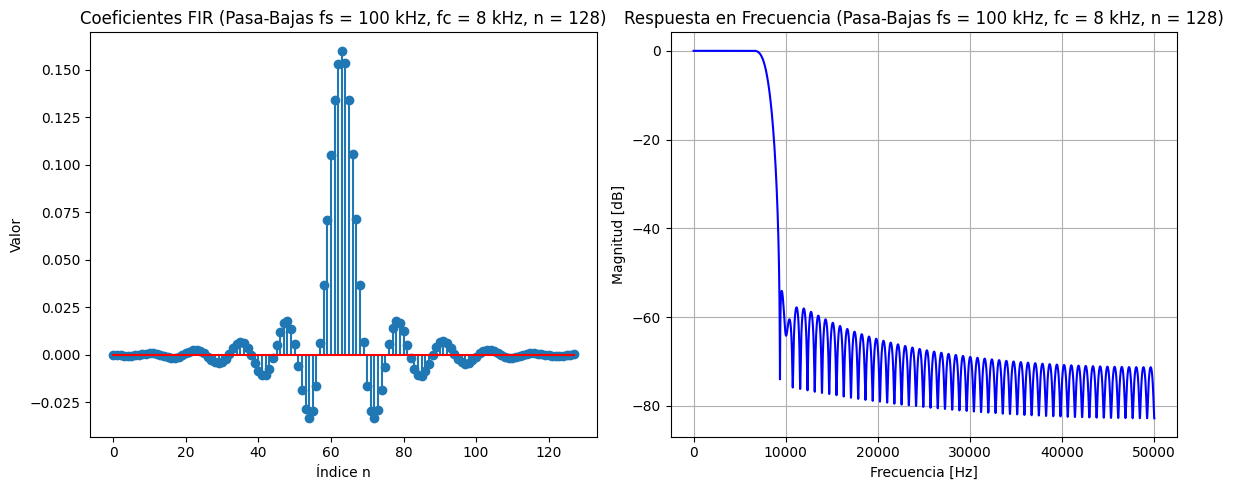

In [33]:
graficar_filtro("../datos/filtro_lowpass.txt", "Pasa-Bajas fs = 100 kHz, fc = 8 kHz, n = 128")
#graficar_filtro("../datos/filtro_highpass.txt", "Pasa-Altas fs = 100 Hz, fc = 8 kHz, n = 128")
#graficar_filtro("../datos/filtro_bandpass.txt", "Pasa-Banda fs = 1000 Hz, (150-300 Hz), n = 128")
#graficar_filtro("../datos/filtro_bandstop.txt", "Rechaza-Banda, (200-400 Hz), n = 128")

### **Conclusión 3**
**Se observa que el filtro Pasa-Bajas implementado con Ventana de Hamming en C++ funciona muy bien para altas frecuencias (en este caso la frecuencia de muestreo es $fs = 100 kHz$ y la frecuencia de corte es de $fc=8 kHz$).  Se observa que la respuesta en frecuncia deja pasar la menores de $8 khz$ y rechaza las mayores de esta frecuencia.**

## **D) Aplicación a una señal mecanica con ruido**

Se aplicará el filtro Pasa-Bajas implementado en C++ con ventana de Hamming a una señal mecanica de oscilación amortiguada con ruido para comparar su desempeño frente a un filtro equivalente generado con la librería `scipy` en Python. 


###  Señal simulada

La señal mecánica que se genera combina varios componentes:

- **Oscilación amortiguada principal** (resonancia):  
  $$ s_{\text{res}}(t) = A \, e^{-z 2\pi f_0 t} \, \sin(2\pi f_0 t) $$

- **Interferencias armónicas** de alta frecuencia:  
  $$ s_{\text{int}}(t) = 0.3 \, \sin(2\pi \cdot 300 \, t) + 0.15 \, \sin(2\pi \cdot 450 \, t) $$

- **Transitorio** localizado en el tiempo (choque o impacto):  
  $$ s_{\text{trans}}(t) = \text{ventana de Hanning alrededor de } t=0.5 \, \text{s} $$

- **Ruido** (blanco y coloreado):  
  $$ s_{\text{ruido}}(t) = n_{\text{blanco}}(t) + n_{\text{sensor}}(t) $$

La señal total queda entonces como:

$$
s(t) = s_{\text{res}}(t) + s_{\text{int}}(t) + s_{\text{trans}}(t) + s_{\text{ruido}}(t)
$$

---

**Visualización en el dominio del tiempo**  
  - Visualización de la señal limpia y ruidosa (señal de entrada)  
  - Visualización de la señal ruidosa de entrada, la filtrada con FIR C++ y la filrtada con scipy Phyton. 
---



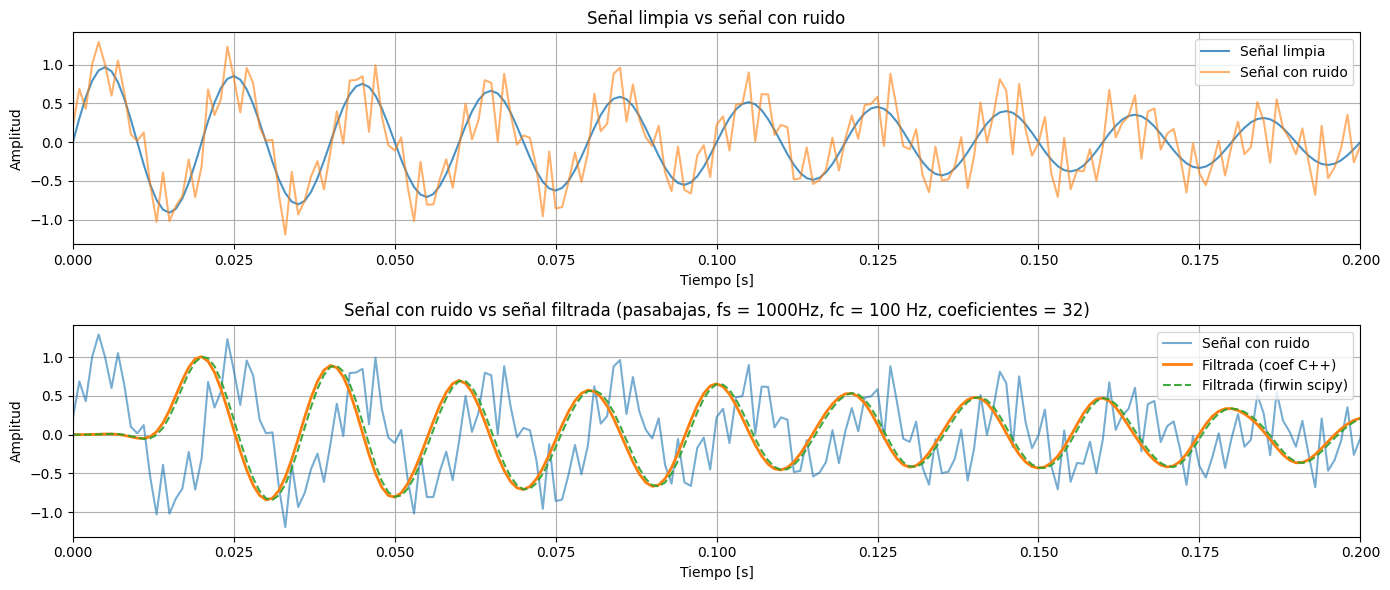

In [39]:
# ---------------------------
# Ejemplo: Señal con ruido + filtrado pasabajas (coef C++)
# ---------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, firwin

# ---------------------------
# 1) Parámetros de la señal
# ---------------------------
fs = 1000.0        # Hz
T = 2.0            # duración en segundos
t = np.arange(0, T, 1.0/fs)

# Señal base (senoidal amortiguada)
f0 = 50.0          # frecuencia principal (Hz)
A = 1.0
zeta = 0.02        # amortiguamiento
env = np.exp(-zeta * 2*np.pi*f0 * t)
sig_clean = A * env * np.sin(2*np.pi*f0*t)

# Ruido + interferencias
sig_interf = 0.3*np.sin(2*np.pi*300*t) + 0.15*np.sin(2*np.pi*450*t)
np.random.seed(0)
white_noise = 0.12 * np.random.randn(len(t))
sig_noisy = sig_clean + sig_interf + white_noise

# ---------------------------
# 2) Cargar coeficientes FIR desde archivo generado en C++
# ---------------------------
def load_coeffs_from_cpp_file(filename):
    coeffs = []
    with open(filename, 'r') as f:
        lines = f.readlines()
    start = False
    for L in lines:
        Ls = L.strip()
        if Ls.startswith("# Coeficientes"):
            start = True
            continue
        if start:
            if Ls == "" or Ls.startswith("#"):
                break
            try:
                coeffs.append(float(Ls))
            except:
                pass
    return np.array(coeffs)

cpp_coeff_file = "../datos/filtro_lowpass.txt"   # asegúrate de tener este archivo
b_cpp = load_coeffs_from_cpp_file(cpp_coeff_file)

# Normalizar (ganancia unitaria en DC)
b_cpp_norm = b_cpp / b_cpp.sum()

# ---------------------------
# 3) Filtrar la señal
# ---------------------------
y_cpp = lfilter(b_cpp_norm, 1.0, sig_noisy)

# (Opcional) comparación con firwin de SciPy
numtaps = len(b_cpp)
cutoff = 100.0   # Hz
b_scipy = firwin(numtaps, cutoff, fs=fs, window='hamming')
y_scipy = lfilter(b_scipy, 1.0, sig_noisy)

# ---------------------------
# 4) Plots
# ---------------------------
plt.figure(figsize=(14, 6))

# Señal limpia vs ruidosa
plt.subplot(2,1,1)
plt.plot(t, sig_clean, label='Señal limpia', alpha=0.8)
plt.plot(t, sig_noisy, label='Señal con ruido', alpha=0.6)
plt.xlim(0, 0.2)  # zoom en el inicio
plt.title("Señal limpia vs señal con ruido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# Señal ruidosa vs filtrada
plt.subplot(2,1,2)
plt.plot(t, sig_noisy, label='Señal con ruido', alpha=0.6)
plt.plot(t, y_cpp, label='Filtrada (coef C++)', linewidth=2)
plt.plot(t, y_scipy, label='Filtrada (firwin scipy)', linestyle='--', alpha=0.9)
plt.xlim(0, 0.2)  # mismo zoom
plt.title("Señal con ruido vs señal filtrada (pasabajas, fs = 1000Hz, fc = 100 Hz, coeficientes = 32)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## **Conclusión 4**

El análisis demuestra que el **filtro FIR implementado en C++** ofrece un desempeño prácticamente idéntico al obtenido con el diseño equivalente realizado en Python mediante **scipy.firwin de Python**.  
Ambos filtros logran recuperar la señal principal de 50 Hz con gran fidelidad(que es la frecuencia principal de la señal de entrada), reduciendo eficazmente el ruido y las interferencias.  

Las ligeras diferencias observadas en amplitud o fase se deben a factores normales del diseño digital (posición de la frecuencia de corte, rizado en la banda pasante y retardo de grupo), pero no representan discrepancias significativas entre ambas implementaciones.  

En conclusión, se valida que los **coeficientes exportados desde C++ son correctos y comparables a los generados en Python**, garantizando consistencia en distintos entornos de programación y asegurando la viabilidad de aplicar el filtrado en sistemas embebidos o de tiempo real.


## **Referencias**

[1] Britton, C. (2011). Notes on digital signal processing. Prentice Hall.

[2] Smith, S. W. (1997). The scientist and engineer’s guide to digital signal 
processing. California Technical Publishing.

[3] Cigarroa-Mayorga, O. (2020, 16 de junio). ¿Qué es un filtro FIR? (Parte 1) [Video]. YouTube. https://www.youtube.com/watch?v=6R_boouvoyc